In [2]:
import numpy as np
from scipy.sparse import csr_matrix,csc_matrix,save_npz,load_npz,coo_matrix, vstack
import sys
from tqdm import tqdm
import h5py
import os
import matplotlib.pyplot as plt

# Load Datasets

In [3]:
HDDFolder = '/home/invites/jmorlot/HDD/'
data_path = HDDFolder + '/Datasets/ATAC_Hemato_Buenrostro/Raw/'
matrixSp = load_npz(data_path+'matrix_scATACseqSparse.npz')
matrixSp = matrixSp.tocsr()
namesCT = np.load(data_path+'names.npy')
labels = np.load(data_path+'labels.npy')

In [7]:
s = np.sum(matrixSp.tocsc(),axis=0)
idx1 = np.where(s>0)[1]
matrix = matrixSp[:,idx1].toarray()

In [11]:
idx = np.argsort(labels)
matrix = matrix[idx,:]
labels = labels[idx]

# Hierarchical representation

In [37]:
sys.path.append('../')
import QualityTester as QT
import QualityMesures as QM
from importlib import reload
from tqdm import tqdm
reload(QT)

<module 'QualityTester' from '../QualityTester.py'>

In [17]:
qt = QT.QualityTester()

In [25]:
def Pooling(matrix,factor):
    if factor<=1:
        return matrix
    M,N = matrix.shape
    NR = N//factor
    matrixR = np.zeros((M,NR))
    for nr in tqdm(range(NR)):
        matrixR[:,nr] = matrix[:,factor*nr:factor*(nr+1)].max(axis=1)
    return matrixR

In [21]:
matrixP = Pooling(matrix,20)

100%|██████████| 24436/24436 [00:13<00:00, 1843.62it/s]


In [22]:
matrixP.shape

(2755, 24436)

In [23]:
Distmat = qt.computeDistanceMatrix(matrixP,labels,PCA='PCA',Distance='Spearman',Kernel='None')

100%|██████████| 10/10 [07:37<00:00, 45.79s/it]


Remove sum outliers


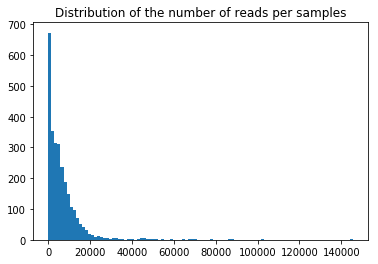

Lower threshold = 128
Upper threshold = 45590
Number of removed samples = 257 / 2755
Computing Distance matrix


In [ ]:
factors = [1,10,20,50,100,200,500,1000,2000,5000,10000]
Pdict = {factor:QT.QualityTester()for factor in factors}

for key in Pdict.keys():
    Pdict[key].compute_samples_quality(matrix=Pooling(matrix,key),labels=labels,
                                       PCA='PCA',Distance='Spearman',Kernel='None',
                                       NR=100,Tz=1.65,names=namesCT,return_Quality=False,
                                       threshold = [0.01, 0.99])

perplexities:   0%|          | 0/8 [00:00<?, ?it/s]

1



learning rates: 100%|██████████| 3/3 [1:08:18<00:00, 1510.18s/it]


Optimal (learning rate,perplexity) = (1000,1000)


learning rates: 100%|██████████| 3/3 [13:38<00:00, 286.09s/it]


Optimal (learning rate,perplexity) = (100,30)


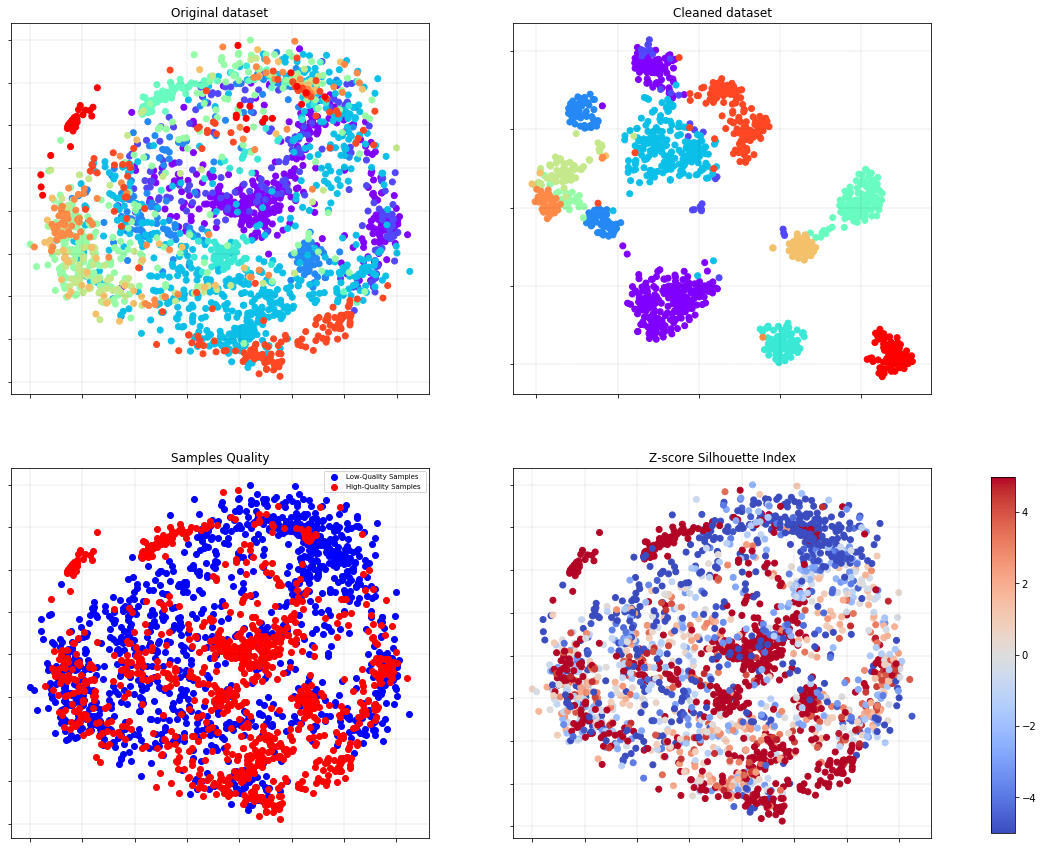

perplexities:   0%|          | 0/8 [00:00<?, ?it/s]

10



learning rates: 100%|██████████| 3/3 [1:16:36<00:00, 1617.23s/it]


Optimal (learning rate,perplexity) = (10,1000)


learning rates: 100%|██████████| 3/3 [18:56<00:00, 411.84s/it]


Optimal (learning rate,perplexity) = (100,30)


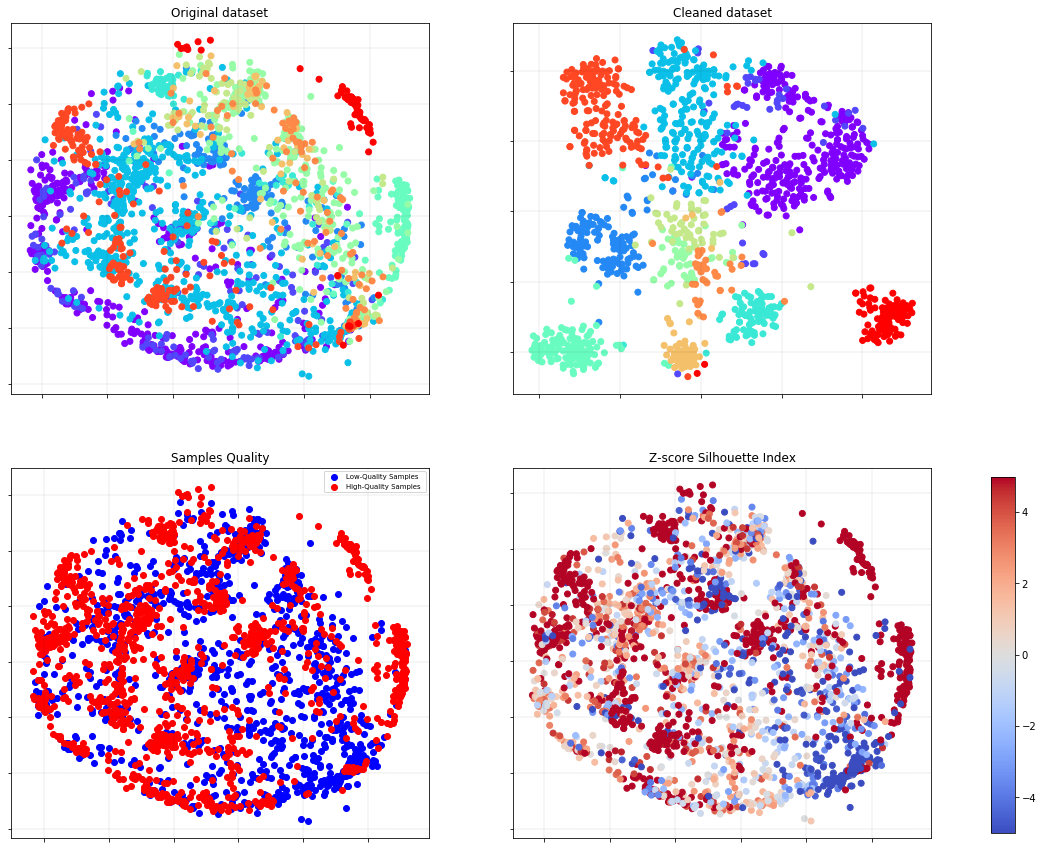

perplexities:   0%|          | 0/8 [00:00<?, ?it/s]

20



learning rates: 100%|██████████| 3/3 [1:20:45<00:00, 1760.22s/it]


Optimal (learning rate,perplexity) = (1000,1000)


learning rates: 100%|██████████| 3/3 [20:06<00:00, 427.57s/it]


Optimal (learning rate,perplexity) = (1000,300)


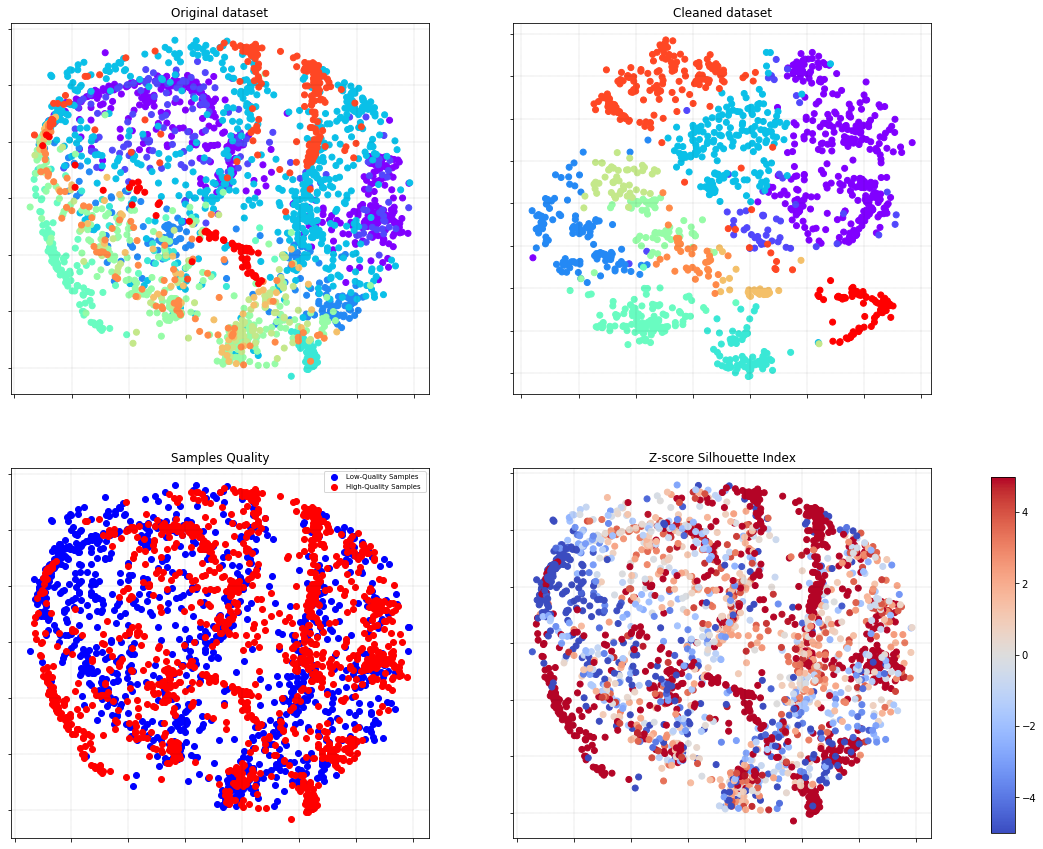

perplexities:   0%|          | 0/8 [00:00<?, ?it/s]

50



learning rates: 100%|██████████| 3/3 [1:25:42<00:00, 1856.73s/it]


Optimal (learning rate,perplexity) = (100,500)


learning rates: 100%|██████████| 3/3 [17:46<00:00, 375.04s/it]


Optimal (learning rate,perplexity) = (10,300)


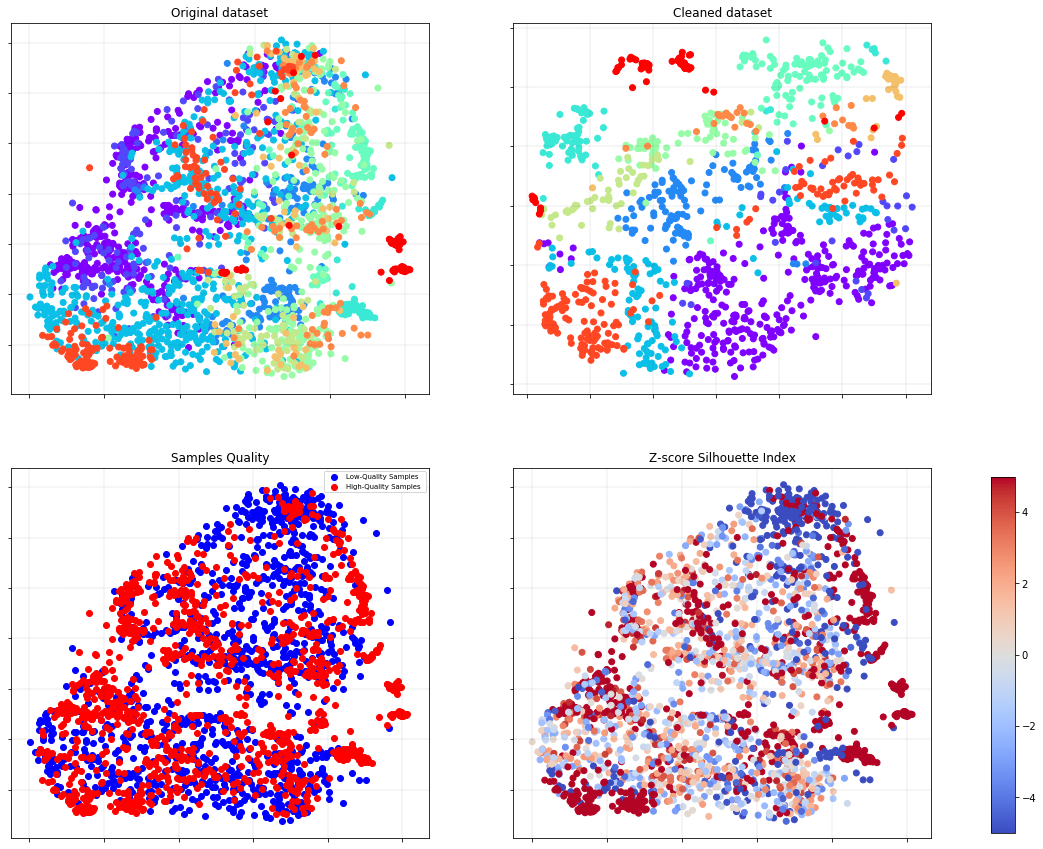

perplexities:   0%|          | 0/8 [00:00<?, ?it/s]

100



learning rates: 100%|██████████| 3/3 [1:23:11<00:00, 1723.59s/it]


Optimal (learning rate,perplexity) = (10,1000)


learning rates: 100%|██████████| 3/3 [09:47<00:00, 213.28s/it]


Optimal (learning rate,perplexity) = (100,5)


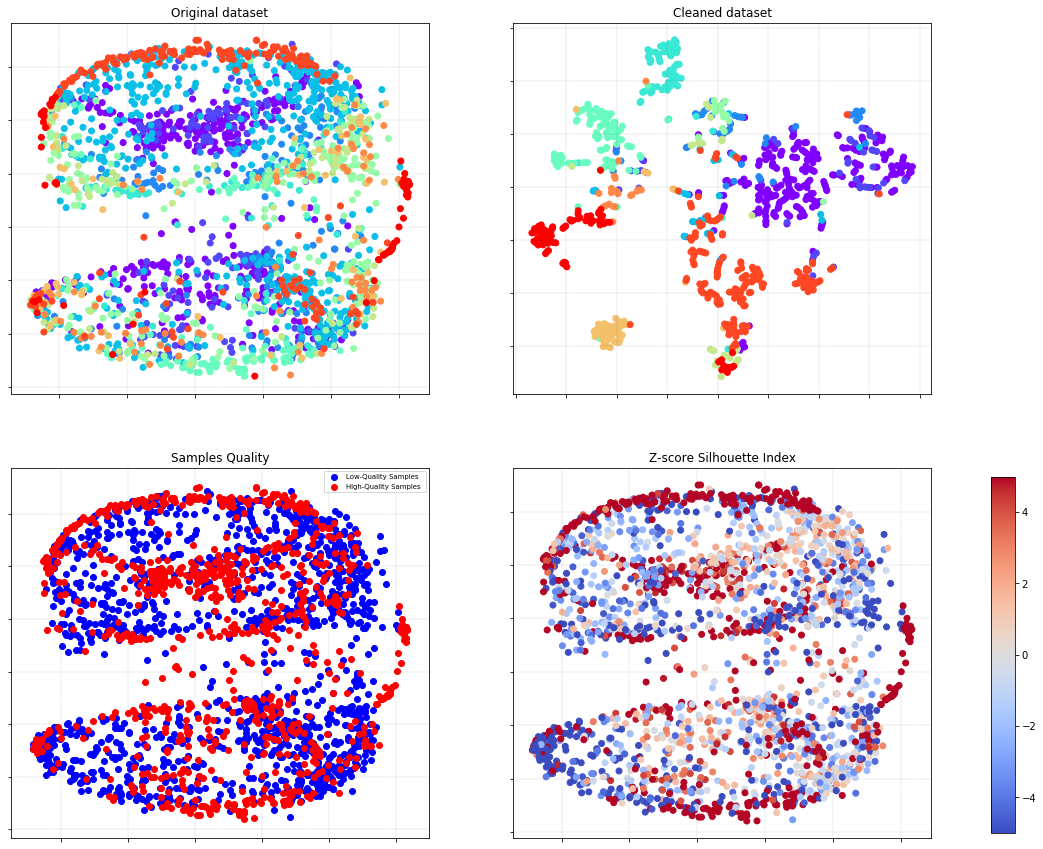

200
Launch "compute_samples_quality" first !


ValueError: 

In [35]:
for key in Pdict.keys():
    print(str(key))
    Pdict[key].display_samples_quality(Save=True,Suffix='Pooling_'+str(key),DR='TSNE',Figsize=15)

  3%|▎         | 84/2443 [00:00<00:02, 834.70it/s]

200


100%|██████████| 2443/2443 [00:02<00:00, 1122.65it/s]


Remove sum outliers


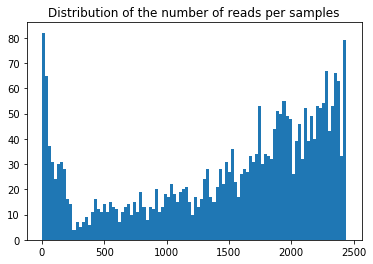

Lower threshold = 28
Upper threshold = 2418
Number of removed samples = 169 / 2755
Computing Distance matrix


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 2755
# Dataset Kept: 688 (25.0 %)
# Dataset Removed: 2067 (75.0 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		141		3.2127466970809873		b'HSC'
1		57		3.457838968439213		b'MPP'
2		38		3.6119162641969997		b'LMPP'
3		23		2.4055457511533214		b'CMP'
4		54		6.789494201446634		b'pDC'
5		96		6.214691003959987		b'CLP'
6		1		1.8241936137436385		b'GMP'
7		14		3.656977626977544		b'GMP1low'
8		38		5.054892672478247		b'GMP2mid'
9		6		2.9723931668557437		b'GMP3high'
10		142		6.37404230178681		b'MEP'
11		78		14.85819518994559		b'Mono'



learning rates: 100%|██████████| 3/3 [1:31:13<00:00, 1931.56s/it]


Optimal (learning rate,perplexity) = (1000,500)


learning rates: 100%|██████████| 3/3 [04:45<00:00, 98.78s/it] 


Optimal (learning rate,perplexity) = (10,30)


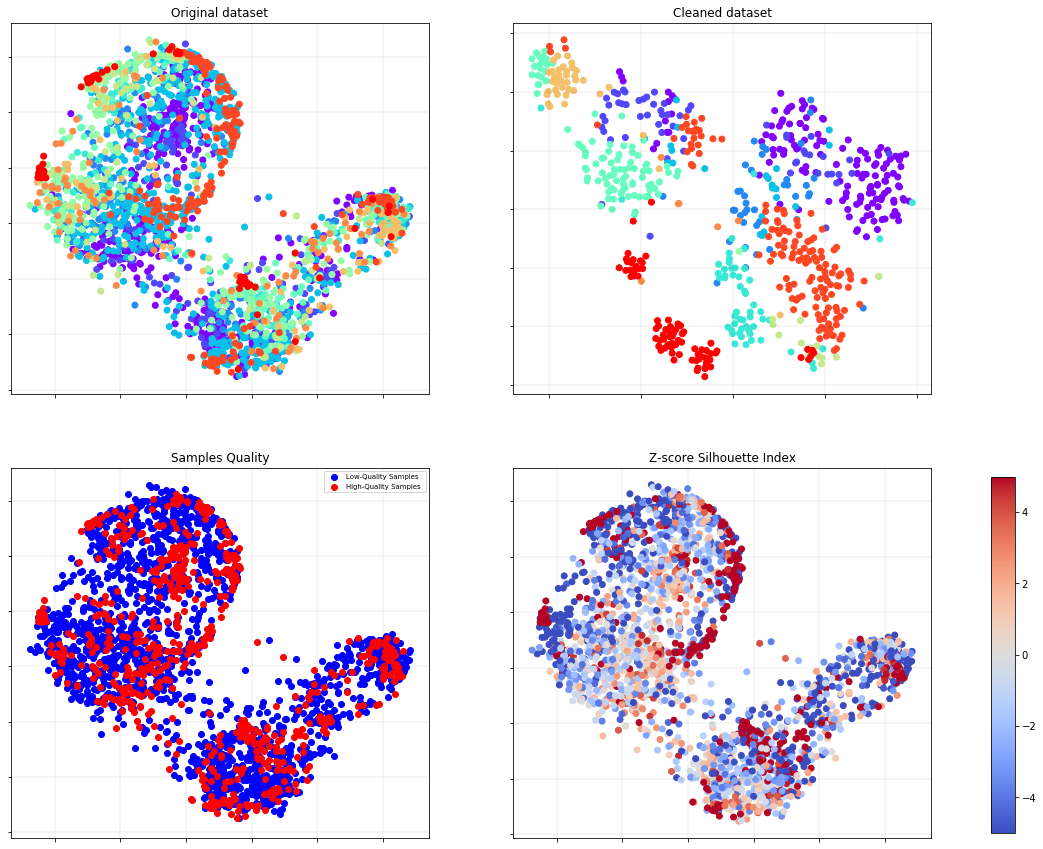

  7%|▋         | 73/977 [00:00<00:01, 727.89it/s]

500


100%|██████████| 977/977 [00:01<00:00, 727.38it/s]


Remove sum outliers


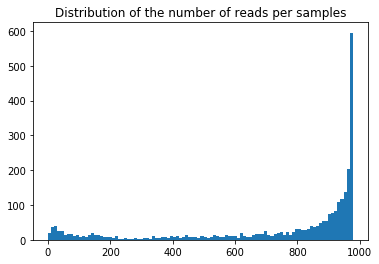

Lower threshold = 9
Upper threshold = 967
Number of removed samples = 610 / 2755
Computing Distance matrix


perplexities:   0%|          | 0/8 [00:00<?, ?it/s]


# Dataset Total: 2755
# Dataset Kept: 238 (8.6 %)
# Dataset Removed: 2517 (91.4 %)

Kept Datasets
Labels		Counts		Mean Zscore Silhouette		Name
0		5		1.8432699890645785		b'HSC'
1		29		2.368293663642752		b'MPP'
2		30		2.37350375956757		b'LMPP'
5		86		3.2829192432170453		b'CLP'
6		10		2.134073241156579		b'GMP'
7		9		2.505830483602914		b'GMP1low'
8		20		2.878159205304512		b'GMP2mid'
10		17		2.0791623564620743		b'MEP'
11		32		3.6199821066525333		b'Mono'

Removed Datasets
Labels		Name
3		b'CMP'
4		b'pDC'
9		b'GMP3high'



perplexities:  50%|█████     | 4/8 [06:49<07:08, 107.11s/it]

In [ ]:
for key in [200,500,1000,2000,5000,10000]:
    print(str(key))
    Pdict[key] = QT.QualityTester()
    Pdict[key].compute_samples_quality(matrix=Pooling(matrix,key),labels=labels,
                                       PCA='PCA',Distance='Spearman',Kernel='None',
                                       NR=100,Tz=1.65,names=namesCT,return_Quality=False,
                                       threshold = [0.01, 0.99])
    
    Pdict[key].display_samples_quality(Save=True,Suffix='Pooling_'+str(key),DR='TSNE',Figsize=15)